In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
col_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('/content/AEP_hourly.csv')

In [4]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [5]:
df = df.set_index('Datetime')

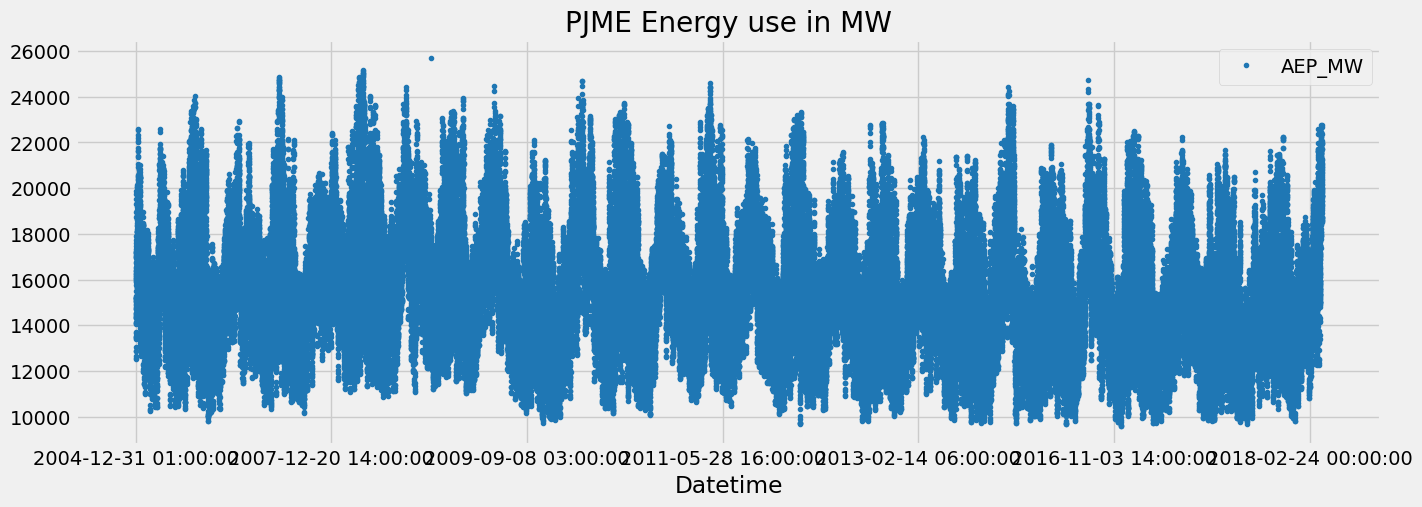

In [6]:
df.plot(style = '.', figsize = (15,5), color = col_pal[0], title = 'PJME Energy use in MW')
plt.show()

In [7]:
df.index

Index(['2004-12-31 01:00:00', '2004-12-31 02:00:00', '2004-12-31 03:00:00',
       '2004-12-31 04:00:00', '2004-12-31 05:00:00', '2004-12-31 06:00:00',
       '2004-12-31 07:00:00', '2004-12-31 08:00:00', '2004-12-31 09:00:00',
       '2004-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=121273)

In [8]:
df.index = pd.to_datetime(df.index)

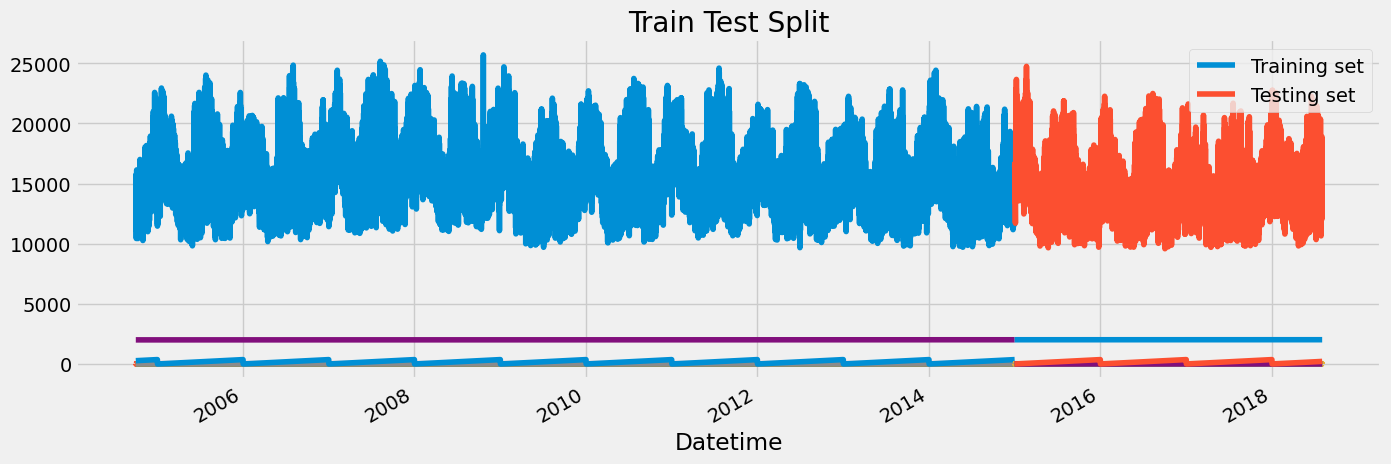

In [31]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']
fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax = ax, label = 'Training set', title = 'Train Test Split')
test.plot(ax = ax, label = 'Test set')
plt.legend(['Training set', 'Testing set'])
plt.show()

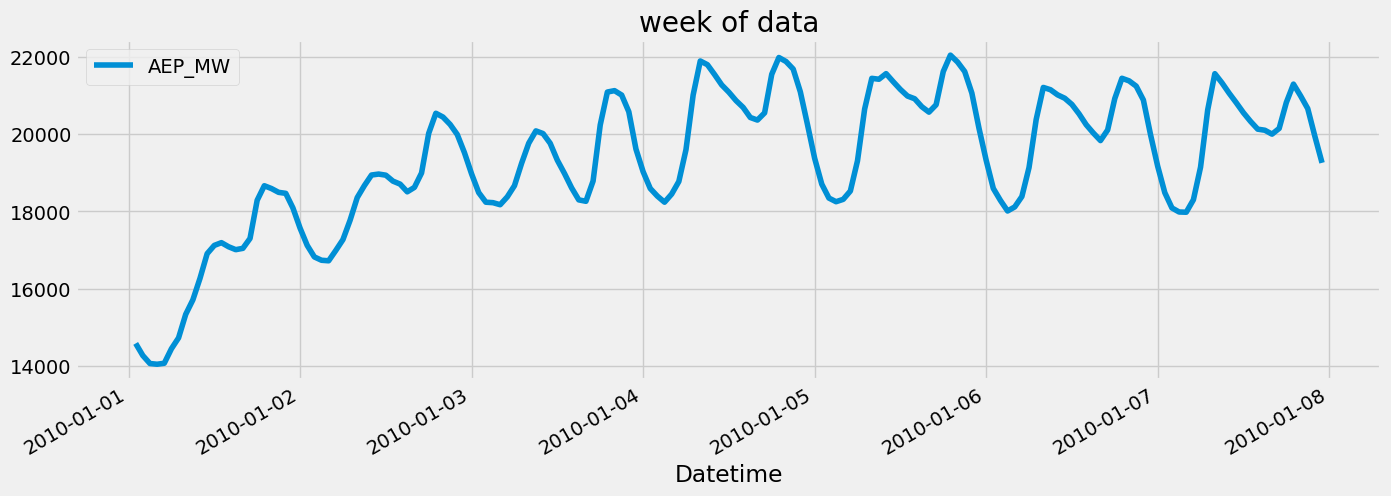

In [10]:
df.loc[(df.index> '01-01-2010') & (df.index < '01-08-2010')].plot(figsize = (15,5), title = 'week of data')
plt.show()

In [13]:
def create_features(df):
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  return df


In [27]:
df = create_features(df)
df.head()


,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366


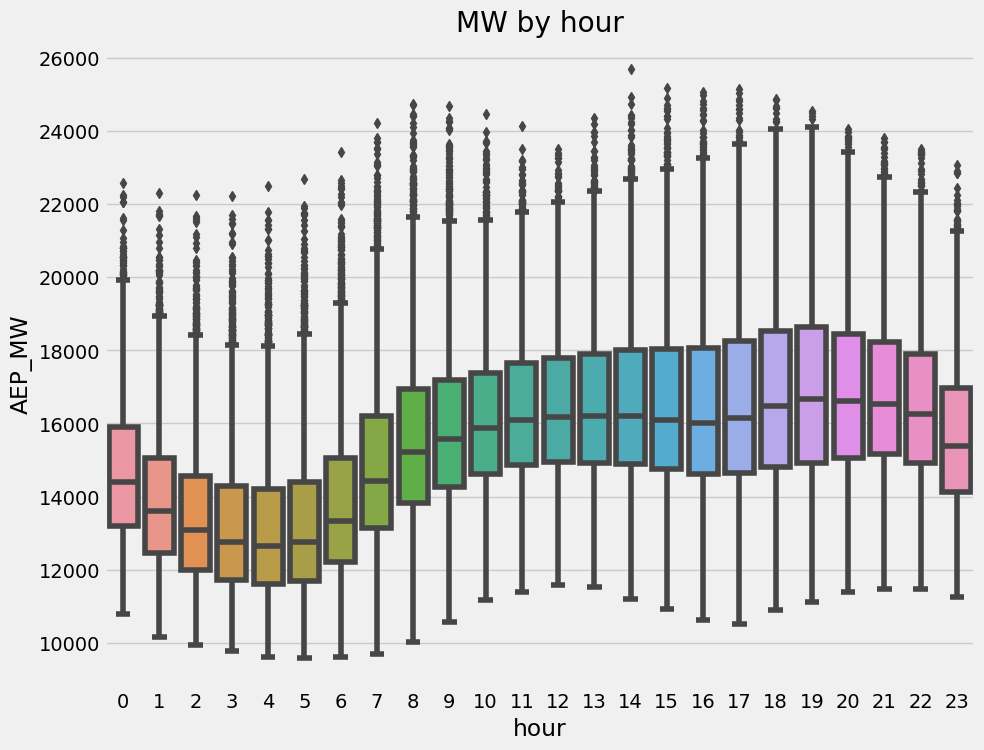

In [24]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x= 'hour', y = 'AEP_MW')
ax.set_title('MW by hour')
plt.show()

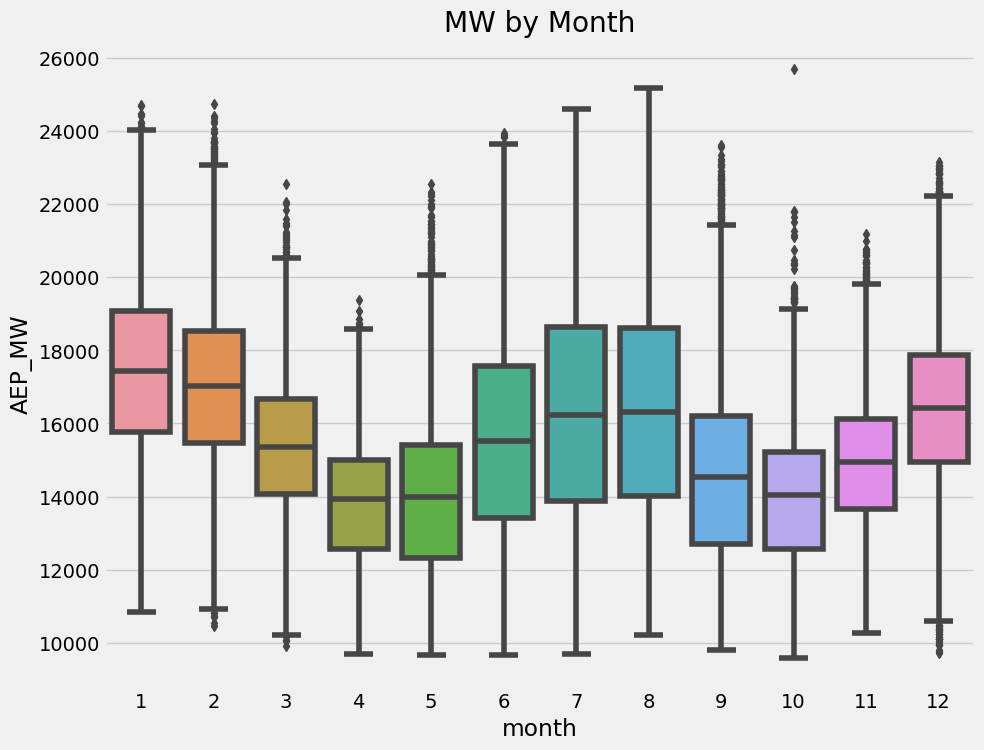

In [25]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x= 'month', y = 'AEP_MW')
ax.set_title('MW by Month')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

In [32]:
Features = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
Target = 'AEP_MW'
x_train = train[Features]
y_train = train[Target]

x_test = test[Features]
y_test = test[Target]

In [72]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.025)
reg.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_test, y_test)], verbose = True)

[0]	validation_0-rmse:15555.69091	validation_1-rmse:14625.31589
[1]	validation_0-rmse:15170.92246	validation_1-rmse:14241.43902
[2]	validation_0-rmse:14795.87214	validation_1-rmse:13867.24289
[3]	validation_0-rmse:14430.28385	validation_1-rmse:13503.45571
[4]	validation_0-rmse:14073.94303	validation_1-rmse:13148.78045
[5]	validation_0-rmse:13726.58324	validation_1-rmse:12802.95565
[6]	validation_0-rmse:13388.00965	validation_1-rmse:12465.96727
[7]	validation_0-rmse:13058.01830	validation_1-rmse:12137.76908
[8]	validation_0-rmse:12736.36388	validation_1-rmse:11818.00351
[9]	validation_0-rmse:12422.79511	validation_1-rmse:11506.28363
[10]	validation_0-rmse:12117.24500	validation_1-rmse:11201.80975
[11]	validation_0-rmse:11819.37192	validation_1-rmse:10905.19085
[12]	validation_0-rmse:11529.12942	validation_1-rmse:10616.88874
[13]	validation_0-rmse:11246.14217	validation_1-rmse:10334.91785
[14]	validation_0-rmse:10970.35616	validation_1-rmse:10058.85961
[15]	validation_0-rmse:10701.50376	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.025, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [73]:
feature_imp = pd.DataFrame(data = reg.feature_importances_, index = reg.feature_names_in_, columns = ['importance'])


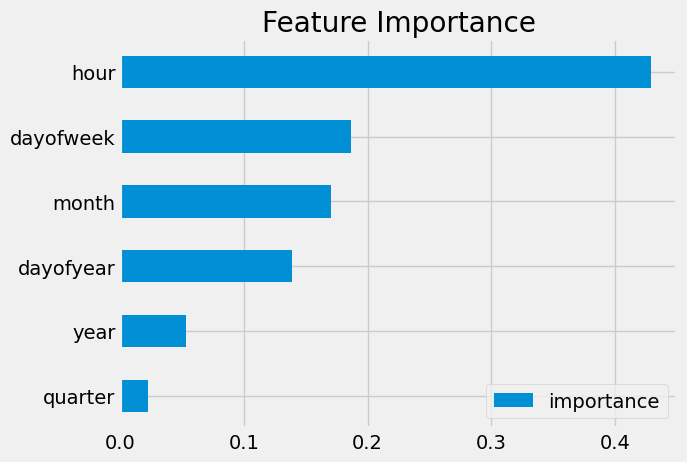

In [74]:
feature_imp.sort_values('importance').plot(kind = 'barh', title = 'Feature Importance')
plt.show()

In [79]:
test['prediction'] = reg.predict(x_test)

<ipython-input-79-10752091d637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(x_test)


In [80]:
df = df.merge(test[['prediction']], how = 'left', left_index = True, right_index = True)

In [77]:
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,prediction_x,prediction_y,prediction_x,prediction_y,prediction_x,prediction_y
Datetime,,,,,,,,,,,,,
2004-10-01 01:00:00,12379.0,1,4,4,10,2004,275,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 02:00:00,11935.0,2,4,4,10,2004,275,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 03:00:00,11692.0,3,4,4,10,2004,275,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 04:00:00,11597.0,4,4,4,10,2004,275,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 05:00:00,11681.0,5,4,4,10,2004,275,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,20,3,3,8,2018,214,17800.480469,17800.480469,17800.480469,17313.283203,17313.283203,17767.705078
2018-08-02 21:00:00,17303.0,21,3,3,8,2018,214,17800.480469,17800.480469,17800.480469,17313.283203,17313.283203,17767.705078
2018-08-02 22:00:00,17001.0,22,3,3,8,2018,214,17526.800781,17526.800781,17526.800781,16985.695312,16985.695312,17625.453125


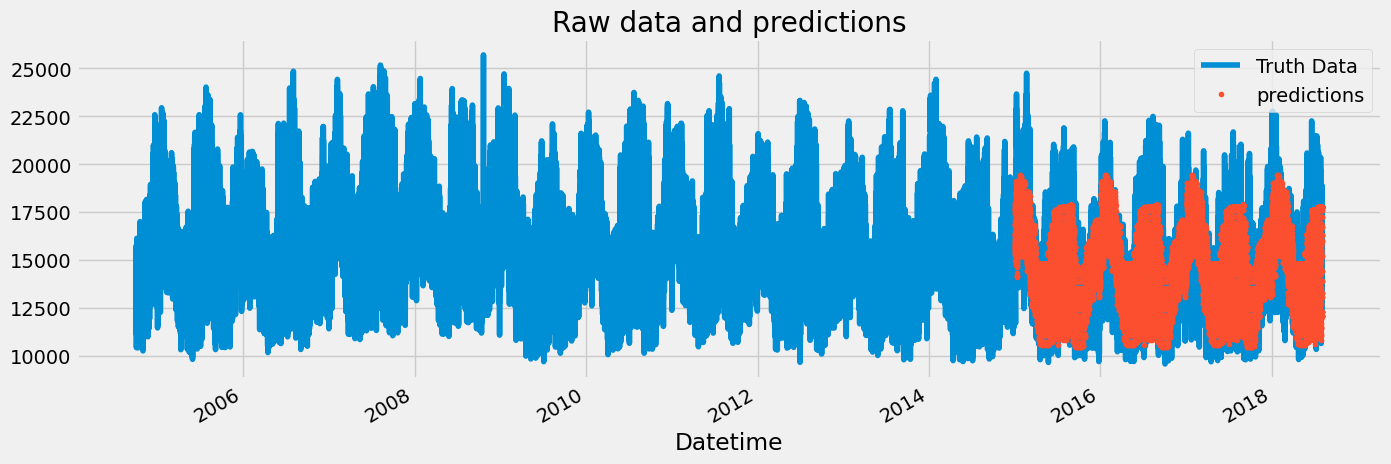

In [81]:
ax = df[['AEP_MW']].plot(figsize = (15,5))
df['prediction'].plot(ax = ax, style = '.')
plt.legend(['Truth Data', 'predictions'])
ax.set_title('Raw data and predictions')
plt.show()

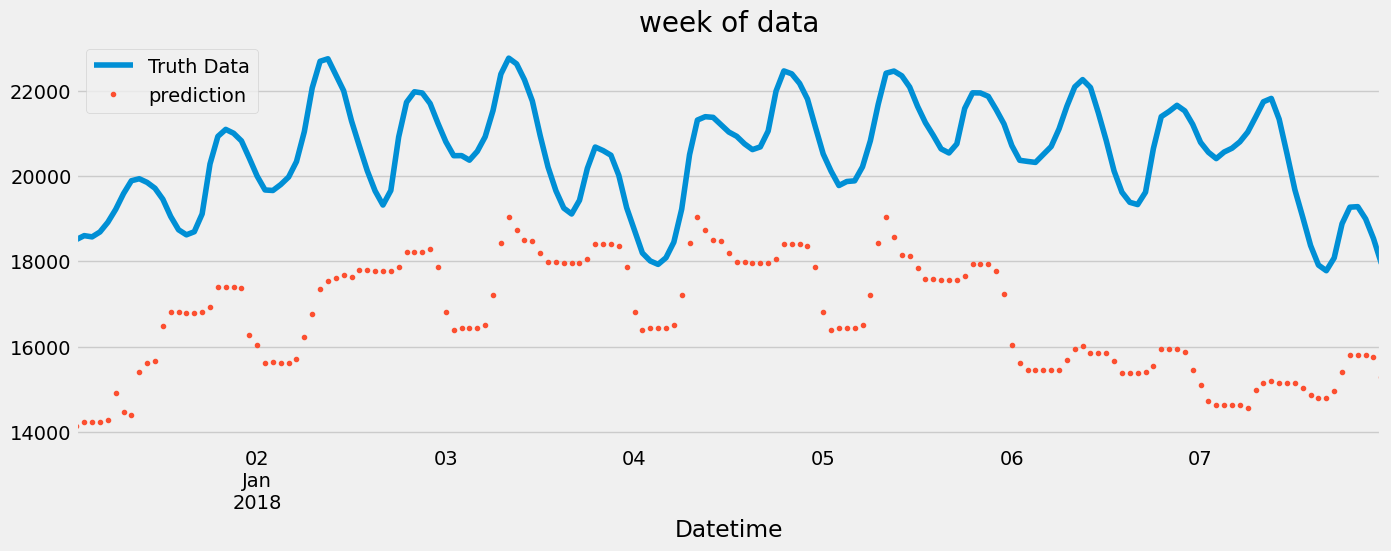

In [82]:
ax = df.loc[(df.index> '01-01-2018') & (df.index < '01-08-2018')]['AEP_MW'].plot(figsize = (15,5), title = 'week of data')

df.loc[(df.index> '01-01-2018') & (df.index < '01-08-2018')]['prediction'].plot(style = '.')
plt.legend(['Truth Data', 'prediction'])
plt.show()